In [5]:
import pandas as pd
for split in ['train', 'valid', 'test']:
    df = pd.read_csv(f'../data/processed/splits/{split}.csv')
    counts = df['target_hit'].value_counts()
    perc = counts / counts.sum() * 100
    print(f"\n📊 {split.upper()} distribution:")
    print(pd.DataFrame({'count': counts, 'percent': perc.round(2)}))


📊 TRAIN distribution:
            count  percent
target_hit                
0           22530    59.18
1           15538    40.82

📊 VALID distribution:
            count  percent
target_hit                
0            8157    98.79
1             100     1.21

📊 TEST distribution:
            count  percent
target_hit                
0            8158    98.79
1             100     1.21


# Phase 2: Exploratory Data Analysis (EDA)
## Step 2.1: Overview & Descriptive Statistics
In this notebook, we perform a deep dive into the cleaned dataset (`step1_quality_checked.csv`) to understand distributions, correlations, and potential patterns before feature engineering.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Add project root to path
project_root = Path('../').resolve()
sys.path.append(str(project_root))

from config import PROCESSED_DATA_DIR, LOGS_DIR

# Set Plotting Style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

print("✅ Libraries Loaded")

✅ Libraries Loaded


In [ ]:
# Load Quality-Checked Data
data_path = PROCESSED_DATA_DIR / "step1_quality_checked.csv"

try:
    df = pd.read_csv(data_path)
    print(f"✅ Loaded Dataset from: {data_path}")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print(f"❌ File not found: {data_path}. Please complete Phase 1 first.")

✅ Loaded Dataset from: E:\AI Trading Signal Prediction\AI-Trading-Signal-Prediction\data\processed\step1_quality_checked.csv
Shape: (76037, 52)


C:\Users\Hana Alaa\AppData\Local\Temp\ipykernel_32600\2595104588.py:5: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [ ]:
# --- Step 2.1: Overview & Descriptive Statistics ---
print("\n--- Dataset Info ---")
df.info()

print("\n--- Numerical Statistics (Summary) ---")
display(df.describe().round(4))

print("\n--- Categorical Statistics ---")
display(df.describe(include=['O']))

print("\n--- Target Balance Check (Refresher) ---")
if 'target_hit' in df.columns:
    print(df['target_hit'].value_counts(normalize=True).mul(100).round(2))



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76037 entries, 0 to 76036
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       76037 non-null  int64  
 1   coin                     76037 non-null  object 
 2   price                    76037 non-null  float64
 3   status                   76037 non-null  int64  
 4   TP5                      76037 non-null  float64
 5   TP7                      76037 non-null  float64
 6   TP9                      76037 non-null  float64
 7   TP10                     76037 non-null  float64
 8   TP12                     76037 non-null  float64
 9   TP14                     76037 non-null  float64
 10  TP16                     76037 non-null  float64
 11  TP18                     76037 non-null  float64
 12  TP20                     76037 non-null  float64
 13  TP25                     76037 non-null  float64
 14  

,id,price,status,TP5,TP7,TP9,TP10,TP12,TP14,TP16,TP18,TP20,TP25,TP30,TP35,TP40,TP45,TP1,low,high,open,close,volume,RSI,sl3,sl5,sl10,price_1day_before_open,price_1day_before_low,price_1day_before_high,price_1day_before_close,price_3day_before_open,price_3day_before_low,price_3day_before_high,price_3day_before_close,rsi_1d,rsi_3d,ema21,ema50,ema100,target_hit,stop_hit,time_to_event
count,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,7.603700e+04,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000,76037.0000
mean,40664.5756,64.5404,0.8267,0.9886,0.9827,0.9775,0.9748,0.9699,0.9653,0.9612,1.0,0.9536,0.9408,0.9321,0.9261,0.9209,0.9168,0.8442,60.8125,66.5511,66.2195,64.5404,2.437130e+10,58.6791,0.4673,0.1937,0.0850,27.9060,26.4135,28.3693,27.2959,28.0304,24.9617,28.8632,26.4961,52.2224,54.6827,35.5669,35.7541,35.8309,0.2046,0.3233,13135.9497
std,24250.2225,1764.4474,0.3785,0.1062,0.1302,0.1484,0.1566,0.1707,0.1831,0.1931,0.0,0.2104,0.2359,0.2516,0.2615,0.2698,0.2763,0.3627,1659.1517,1815.2095,1809.5992,1764.4474,3.805916e+11,31.1582,0.4989,0.3952,0.2789,1146.2631,1092.8251,1160.2967,1122.6796,1147.8104,1034.9353,1169.4975,1083.9626,17.1018,16.7221,1342.2656,1347.3293,1345.9638,0.4034,0.4677,21718.1572
min,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.781000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.4167
25%,19964.0000,0.0512,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0494,0.0534,0.0526,0.0512,4.734484e+05,32.1687,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,42.6270,45.8115,0.0000,0.0000,0.0000,0.0000,0.0000,1635.5333
50%,39965.0000,0.2907,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2822,0.3020,0.2984,0.2907,2.382424e+06,51.5789,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,53.6126,55.3933,0.0000,0.0000,0.0000,0.0000,0.0000,3916.9083
75%,59584.0000,1.5520,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.5120,1.6120,1.5915,1.5520,1.772603e+07,100.0000,1.0000,0.0000,0.0000,0.0762,0.0704,0.0830,0.0770,0.0771,0.0672,0.0857,0.0760,61.5931,63.6012,0.1874,0.1859,0.1829,0.0000,1.0000,23897.8500
max,86738.0000,104169.3900,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,100333.0000,106778.0500,106670.3700,104169.3900,3.110864e+13,100.0000,1.0000,1.0000,1.0000,73072.4000,69570.8200,73777.0000,71388.9400,73004.0400,68752.0300,73777.0000,70006.2300,100.0000,100.0000,98316.7502,97685.0102,95964.8894,1.0000,1.0000,458653.6500



--- Categorical Statistics ---


,coin,created_at,1h,1day,3day,ema21_all,ema50_all,ema100_all,atr_1h
count,76037,76037,76037,76037,76037,76037,76037,76037,76037
unique,460,74404,48811,26491,17539,25656,25656,25637,22491
top,ALPHA,2024-04-12 18:47:31,[],"[[1709337600000,""1.20460000"",""1.25060000"",""1.1...","[[1707091200000,""1.02090000"",""1.14240000"",""1.0...","[0.14548571428571425,0.14467792207792204,0.144...","[0.14050199999999996,0.14026662745098034,0.140...",[0.13569799999999993],[]
freq,1789,3,22475,22389,22417,46404,46404,46404,22337



--- Target Balance Check (Refresher) ---
target_hit
0    79.54
1    20.46
Name: proportion, dtype: float64


## Step 2.2: Distributions
Here we visualize the distribution of our target variables (`target_hit`, `stop_hit`) to check for imbalance, and examine key numeric features.

C:\Users\Hana Alaa\AppData\Local\Temp\ipykernel_32600\1328165877.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target_hit', data=df, ax=axes[0], palette='viridis')
C:\Users\Hana Alaa\AppData\Local\Temp\ipykernel_32600\1328165877.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stop_hit', data=df, ax=axes[1], palette='magma')


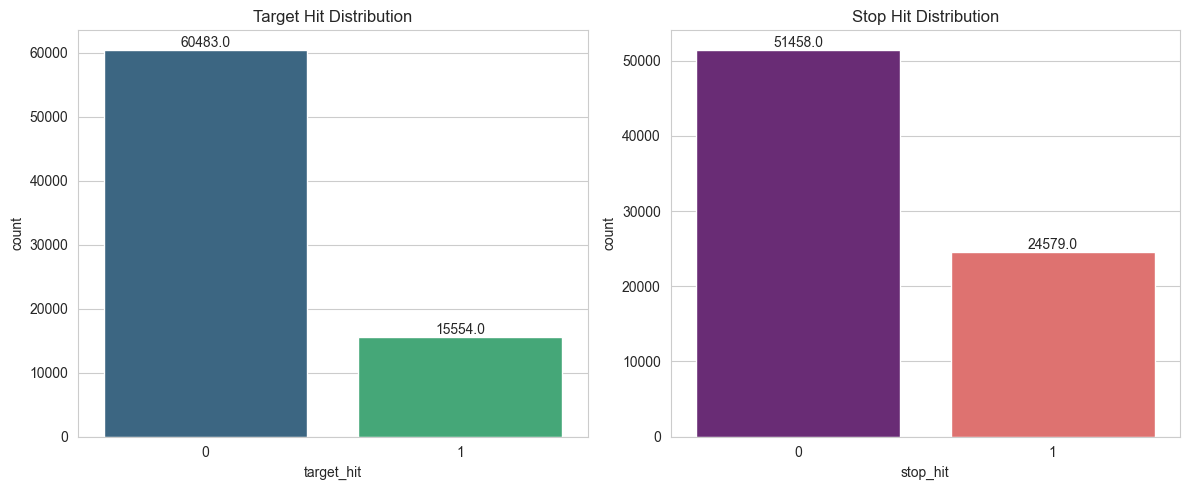

In [ ]:
# 1. Target Distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

if 'target_hit' in df.columns:
    sns.countplot(x='target_hit', data=df, ax=axes[0], palette='viridis')
    axes[0].set_title('Target Hit Distribution')
    for p in axes[0].patches:
        axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

if 'stop_hit' in df.columns:
    sns.countplot(x='stop_hit', data=df, ax=axes[1], palette='magma')
    axes[1].set_title('Stop Hit Distribution')
    for p in axes[1].patches:
        axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

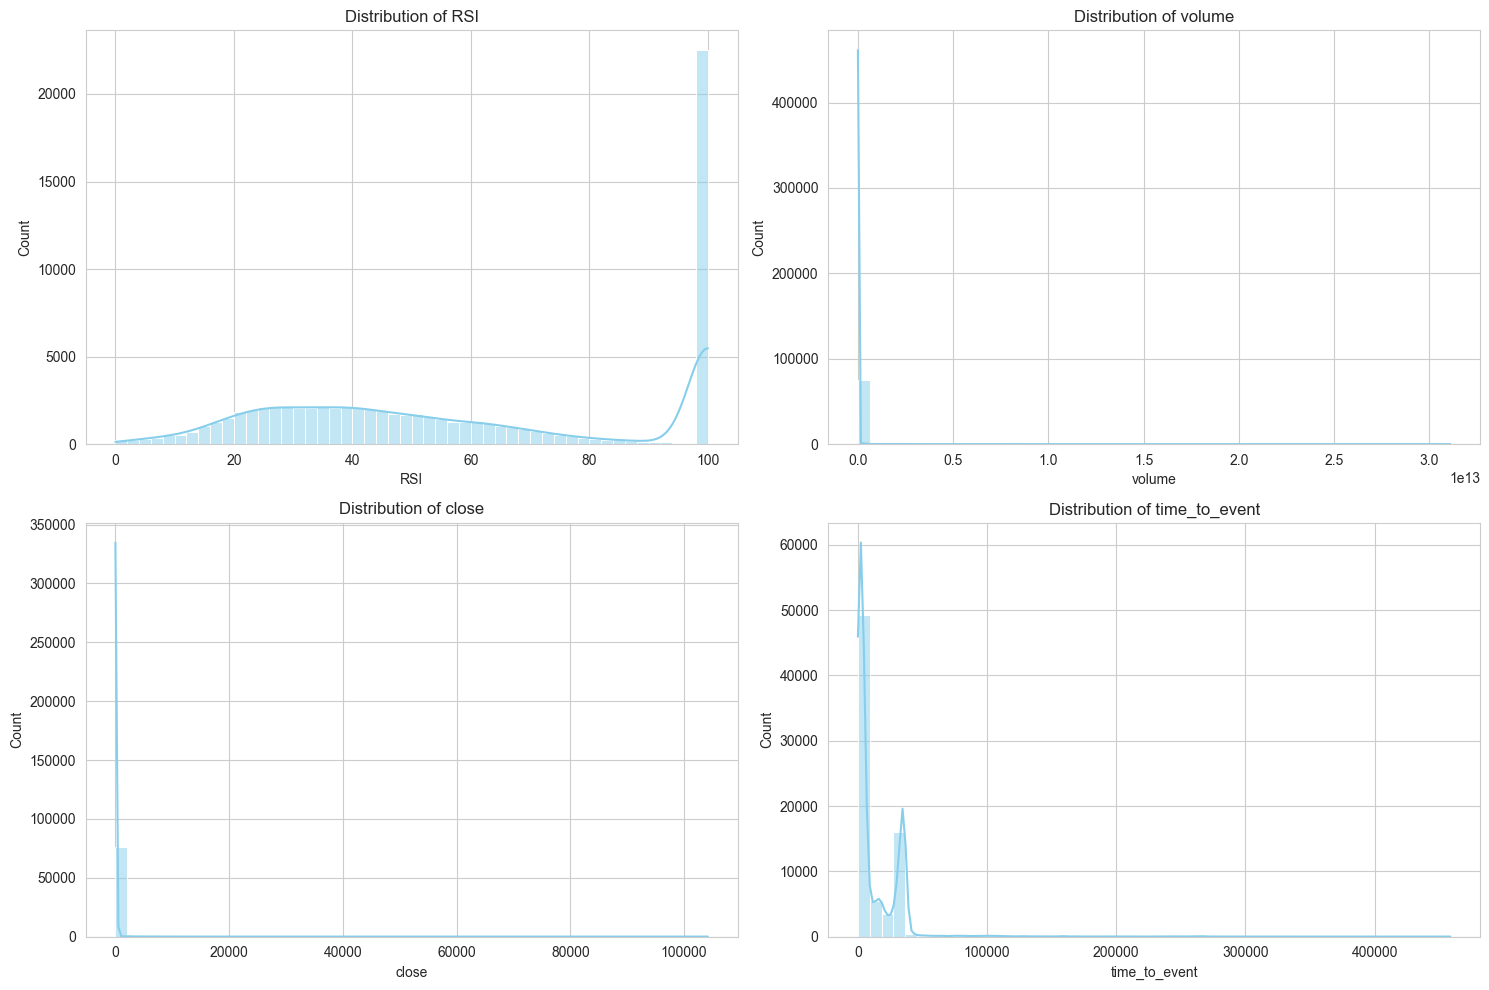

In [ ]:
# 2. Key Numeric Feature Distributions
# Select a few key features to visualize - modify this list as needed
key_numeric_cols = ['RSI', 'volume', 'close', 'time_to_event']
available_cols = [c for c in key_numeric_cols if c in df.columns]

if available_cols:
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(available_cols):
        plt.subplot(2, 2, i + 1)
        sns.histplot(df[col], kde=True, bins=50, color='skyblue')
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()
else:
    print("Key numeric columns for visualization not found.")

## Step 2.3: Correlations (Matrix & Heatmap)
Understanding relationships between numeric features and the target variable.

e:\AI Trading Signal Prediction\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
e:\AI Trading Signal Prediction\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\Hana Alaa\AppData\Local\Temp\ipykernel_32600\2744067347.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=corr_target.index[:20], x=corr_target.values[:20], palette='coolwarm')


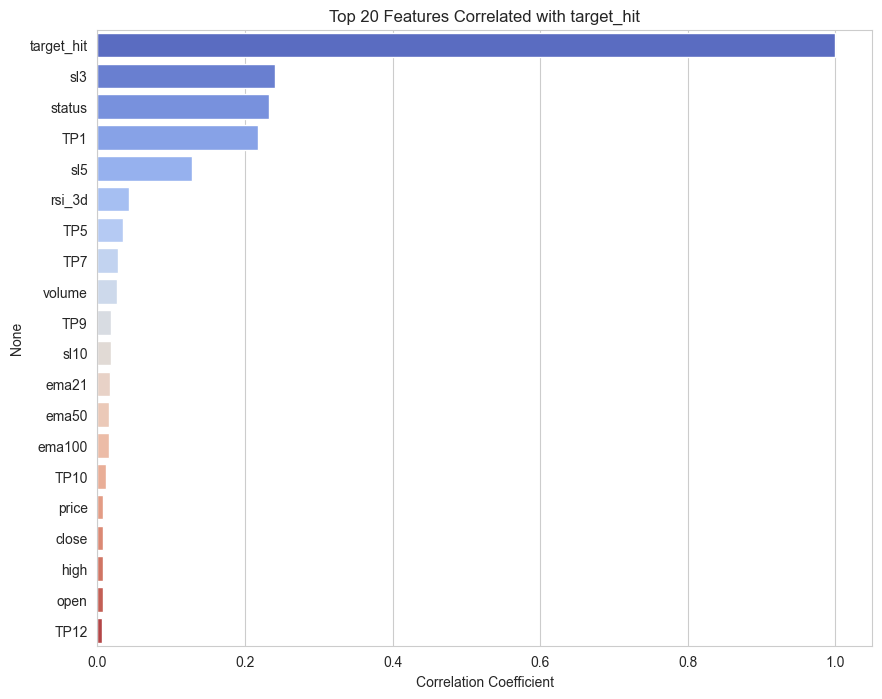

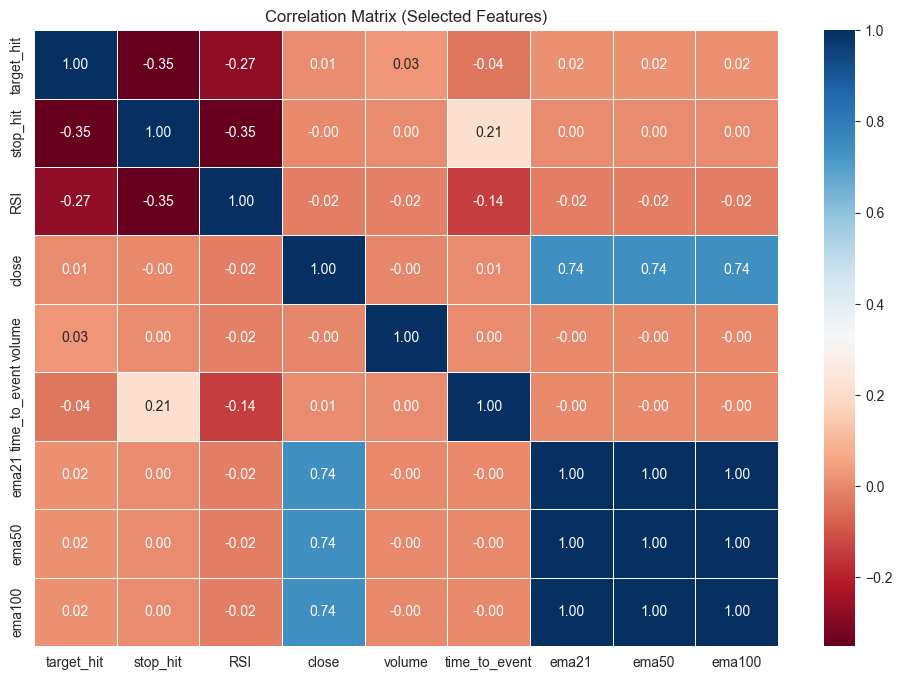

In [ ]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# 1. Correlation with Target
if 'target_hit' in numeric_df.columns:
    corr_target = numeric_df.corrwith(df['target_hit']).sort_values(ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(y=corr_target.index[:20], x=corr_target.values[:20], palette='coolwarm')
    plt.title('Top 20 Features Correlated with target_hit')
    plt.xlabel('Correlation Coefficient')
    plt.show()

# 2. General Correlation Heatmap (Feature-Feature)
# Using a subset of features to keep the plot readable
focus_features = ['target_hit', 'stop_hit', 'RSI', 'close', 'volume', 'time_to_event']
# Add some potential EMA features if they exist
extra_feats = [c for c in ['ema21', 'ema50', 'ema100', 'atr_1h'] if c in df.columns]
focus_features.extend(extra_feats)

if all(col in df.columns for col in focus_features if col not in ['target_hit', 'stop_hit']):
    corr_matrix = df[focus_features].select_dtypes(include=np.number).corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix (Selected Features)')
    plt.show()
else:
    print("Some focus features for heatmap are missing.")

## Step 2.4: Pairplots / Boxplots / Histograms
Visualizing interactions between features and the target.

C:\Users\Hana Alaa\AppData\Local\Temp\ipykernel_32600\2616634079.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target_hit', y=col, data=df, palette='Set2')
C:\Users\Hana Alaa\AppData\Local\Temp\ipykernel_32600\2616634079.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target_hit', y=col, data=df, palette='Set2')
C:\Users\Hana Alaa\AppData\Local\Temp\ipykernel_32600\2616634079.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target_hit', y=col, data=df, palette='Set2')


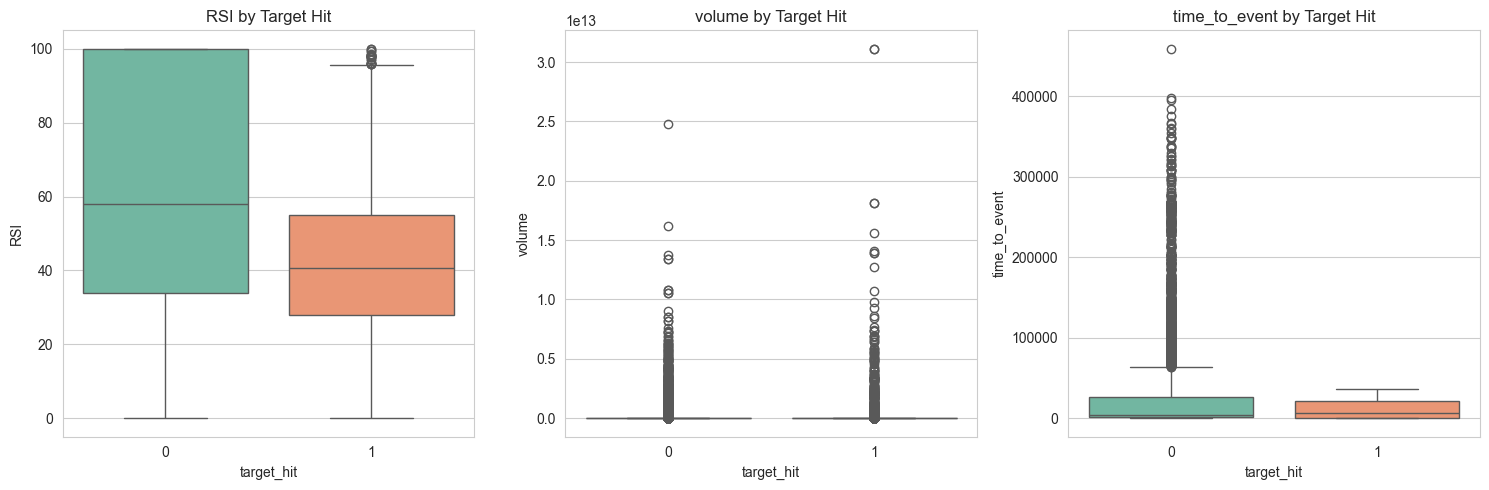

In [ ]:
# 1. Boxplots: Compare Distribution of Key Features by Target Outcome
key_feats_for_boxplot = ['RSI', 'volume', 'time_to_event']
available_box_feats = [c for c in key_feats_for_boxplot if c in df.columns]

if 'target_hit' in df.columns and available_box_feats:
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(available_box_feats):
        plt.subplot(1, 3, i + 1)
        sns.boxplot(x='target_hit', y=col, data=df, palette='Set2')
        plt.title(f'{col} by Target Hit')
    plt.tight_layout()
    plt.show()

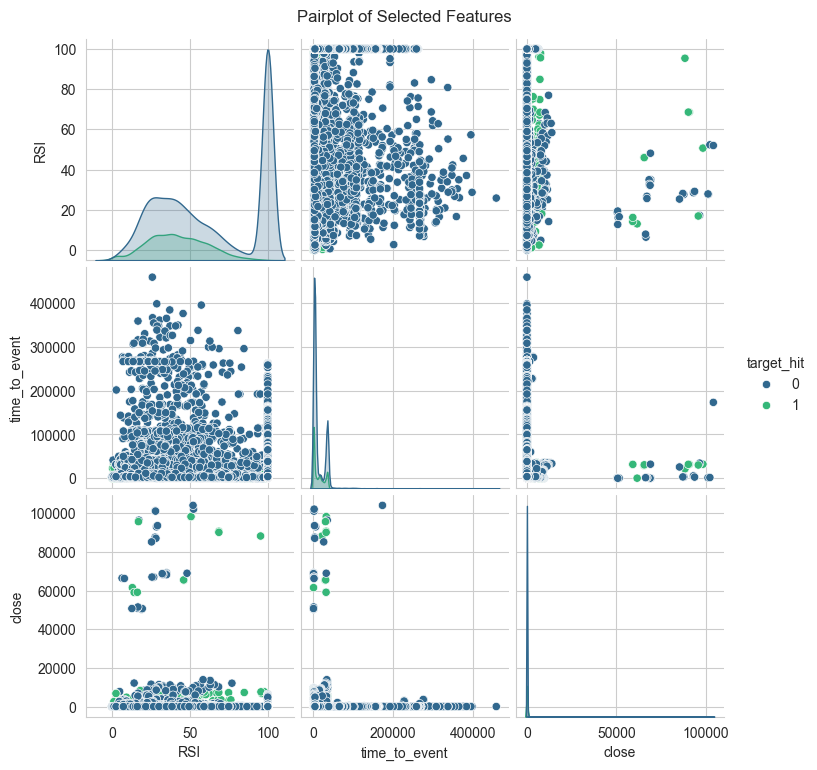

In [ ]:
# 2. Pairplot (Subset)
# We strictly limit columns to avoid crashing the kernel with a huge plot
pairplot_cols = ['target_hit', 'RSI', 'time_to_event']
if 'close' in df.columns:
    pairplot_cols.append('close')

available_pair_cols = [c for c in pairplot_cols if c in df.columns]

if len(available_pair_cols) > 1:
    sns.pairplot(df[available_pair_cols], hue='target_hit' if 'target_hit' in available_pair_cols else None, 
                 palette='viridis', diag_kind='kde')
    plt.suptitle("Pairplot of Selected Features", y=1.02)
    plt.show()

## Step 2.5: Insights Summary
Summary of findings from the EDA phase.

In [ ]:
print("--- Auto-Generated Insights Summary ---")

# 1. Data Balance
if 'target_hit' in df.columns:
    target_counts = df['target_hit'].value_counts(normalize=True)
    print(f"🔹 Target Balance: The dataset has {target_counts.get(1, 0):.1%} positive samples (1) and {target_counts.get(0, 0):.1%} negative samples (0).")

# 2. Top Correlations
if 'target_hit' in numeric_df.columns:
    top_pos_corr = corr_target.head(3).index.tolist()
    top_neg_corr = corr_target.tail(3).index.tolist()
    print(f"🔹 Top Positive Correlations with Target: {top_pos_corr}")
    print(f"🔹 Top Negative Correlations with Target: {top_neg_corr}")

# 3. Outliers (using IQR method from previous step logic)
print("🔹 Feature Distributions: Check the histograms above for skewness. Features like 'volume' and 'time_to_event' often require log-transformation.")

print("\n📝 Note: Use these insights to guide Phase 3 (Feature Engineering). For example, if 'RSI' shows good separation in boxplots, prioritize it for interaction features.")

--- Auto-Generated Insights Summary ---
🔹 Target Balance: The dataset has 20.5% positive samples (1) and 79.5% negative samples (0).
🔹 Top Positive Correlations with Target: ['target_hit', 'sl3', 'status']
🔹 Top Negative Correlations with Target: ['stop_hit', 'id', 'TP18']
🔹 Feature Distributions: Check the histograms above for skewness. Features like 'volume' and 'time_to_event' often require log-transformation.

📝 Note: Use these insights to guide Phase 3 (Feature Engineering). For example, if 'RSI' shows good separation in boxplots, prioritize it for interaction features.
